In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import torch

# Introduction to PyTorch

[PyTorch](https://pytorch.org/) is an opensource Python library based on the Lua library [Torch](http://torch.ch/).
It is a very popular numeric library that is designed for deep learning and is developed by [Facebook's AI Research lab](https://ai.facebook.com/research/) (FAIR).

## The graphics processing unit (GPU)

Deep learning can be very intensive on your computer and it could take days to finish processing using only your computer's central processing unit (CPU).
To get around this, we usually make use of the graphics processing unit (GPU).
A **GPU** is a processor found on your graphics card which can perform many numeric computations in parallel, enabling us to drastically reduce our deep learning processing time.

Unfortunately, only NVIDIA's graphic cards can be used to execute code.
To be able to execute instructions on the GPU, NVIDIA provides a driver called the **CUDA framework**.
You normally use the CUDA driver through C++ libraries, but PyTorch hides that away behind Python code for you.
If you have an NVIDIA graphic card, download the CUDA driver for your operating system from [here](https://developer.nvidia.com/cuda-zone).
You can check which CUDA version you have by running this command in your command prompt / terminal:

    nvcc --version

Once you've installed CUDA or determined that you won't be using it, install PyTorch by following the instructions [here](https://pytorch.org/get-started/locally/).
Choose the CPU option if you don't have an NVIDIA graphic card.
If you have an older graphic card, [older versions of PyTorch](https://pytorch.org/get-started/previous-versions/) support up to CUDA 7.5.

## Tensors and NumPy

One of the most important concepts to understand in deep learning is the notion of a **tensor**.
A tensor is a regularly shaped array of numbers of any number of dimensions.
The simplest tensor is the **scalar**, which is just a single number (zero dimensions).
A 1D array of numbers is called a **vector** and a 2D grid of numbers is called a **matrix**.
All of these are different types of tensors, which can keep on growing in dimensionality (3D, 4D, and so on).
The challenge in deep learning is finding a way to represent your inputs and outputs using tensors, such as a sentence being represented as a vector where each number is a different word, or a photo being represented as a matrix where each number is a different pixel.
We'll see different ways of representing text as tensors in later topics.

NumPy is a very popular numeric library for working with tensors and it is used internally by PyTorch.
Let's take a quick look at NumPy before getting into PyTorch.
In NumPy, the `np.array` function creates a tensor from nested lists (vectors are a single list, matrices are lists of lists, and so on) and a data type such as `int64` (long integer), `float32` (single precision float), or `bool_` (Boolean) to specify the data type of the numbers.
Note that a lot of stuff in PyTorch expects `int64` integers, so we might as well use those all the time.
You can get the number of dimensions in a NumPy array using the `ndim` attribute and you can see the size of each dimension using the `shape` attribute (a matrix with 2 rows and 3 columns has a shape of `(2, 3)`).
Here are some examples:

In [2]:
print('scalar')
scalar = np.array(1, dtype=np.int64)
print(scalar)
print('ndim:', scalar.ndim)
print('shape:', scalar.shape)
print()

print('vector')
vector = np.array([1, 2, 3, 4], dtype=np.int64)
print(vector)
print('ndim:', vector.ndim)
print('shape:', vector.shape)
print()

print('matrix')
matrix = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.int64)
print(matrix)
print('ndim:', matrix.ndim)
print('shape:', matrix.shape)
print()

print('3D tensor')
tensor3d = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]], dtype=np.int64)
print(tensor3d)
print('ndim:', tensor3d.ndim)
print('shape:', tensor3d.shape)

scalar
1
ndim: 0
shape: ()

vector
[1 2 3 4]
ndim: 1
shape: (4,)

matrix
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
ndim: 2
shape: (3, 4)

3D tensor
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]
ndim: 3
shape: (2, 3, 4)


With NumPy you can very easily add all the numbers in a vector by 1 or double them, or even add/multiply two vectors together (as long as they have the same shape) without needing to use a `for` loop.

In [3]:
vector = np.array([1, 2, 3, 4], np.int64)
print('vector')
print(vector)
print()

print('vector + 1')
print(vector + 1)
print()

print('vector * 2')
print(vector * 2)
print()

print('vector + vector')
print(vector + vector)
print()

print('vector * vector')
print(vector * vector)

vector
[1 2 3 4]

vector + 1
[2 3 4 5]

vector * 2
[2 4 6 8]

vector + vector
[2 4 6 8]

vector * vector
[ 1  4  9 16]


And this is how you do a matrix multiplication:

In [4]:
matrix1 = np.array([[1, 2], [3, 4]], np.float32)
matrix2 = np.array([[1, 0], [0, 1]], np.float32)
print('matrix1')
print(matrix1)
print()
print('matrix2')
print(matrix2)
print()
print('matrix1@matrix2')
print(matrix1@matrix2)

matrix1
[[1. 2.]
 [3. 4.]]

matrix2
[[1. 0.]
 [0. 1.]]

matrix1@matrix2
[[1. 2.]
 [3. 4.]]


Note that you cannot multiply a vector to a matrix, only a matrix to a matrix.
If you need to multiply a vector to a matrix you'd need to make the vector be a single row matrix:

In [5]:
matrix1 = np.array([[1, 2]], np.float32)
matrix2 = np.array([[1, 0], [0, 1]], np.float32)
print('matrix1')
print(matrix1)
print()
print('matrix2')
print(matrix2)
print()
print('matrix1@matrix2')
print(matrix1@matrix2)

matrix1
[[1. 2.]]

matrix2
[[1. 0.]
 [0. 1.]]

matrix1@matrix2
[[1. 2.]]


You can also manipulate the dimensions of a tensor:

In [6]:
matrix = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], np.int64)
print('the matrix:')
print(matrix)
print()

print('second element of first row:')
print(matrix[0, 1])
print()

print('all elements of first row:')
print(matrix[0, :])
print()

print('all elements of first column:')
print(matrix[:, 0])
print()

print('the matrix with an extra dimension at the end:')
print(matrix[:, :, None])
print()

print('the matrix with an extra dimension at the front:')
print(matrix[None, :, :])
print()

print('first row but as a single row matrix (add a dimension of size 1 before row data):')
print(matrix[:, None, :])
print()

print('first row but as a single column matrix (add a dimension of size 1 after row data):')
print(matrix[0, :, None])
print()

print('reshape 3x4 matrix into 4x3:')
print(matrix.reshape([4, 3]))
print()

print('reshape 3x4 matrix into 3x2x2:')
print(matrix.reshape([3, 2, 2]))
print()

print('reshape 3x4 matrix into 12:')
print(matrix.reshape([12]))

the matrix:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

second element of first row:
2

all elements of first row:
[1 2 3 4]

all elements of first column:
[1 5 9]

the matrix with an extra dimension at the end:
[[[ 1]
  [ 2]
  [ 3]
  [ 4]]

 [[ 5]
  [ 6]
  [ 7]
  [ 8]]

 [[ 9]
  [10]
  [11]
  [12]]]

the matrix with an extra dimension at the front:
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]]

first row but as a single row matrix (add a dimension of size 1 before row data):
[[[ 1  2  3  4]]

 [[ 5  6  7  8]]

 [[ 9 10 11 12]]]

first row but as a single column matrix (add a dimension of size 1 after row data):
[[1]
 [2]
 [3]
 [4]]

reshape 3x4 matrix into 4x3:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

reshape 3x4 matrix into 3x2x2:
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]

reshape 3x4 matrix into 12:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


When reshaping a tensor, it's important that the number of elements in the tensor do not change.
So we can reshape a 3 by 4 tensor into a 3 by 2 by 2 tensor (3×4 = 3×2×2) but not into a 3 by 3 tensor.

A dimension of size 1 is called a **singleton dimension**.

You can even join tensors together, either by **concatenating** or **stacking**.
When you concatenate two matrices, you either join them side-by-side or on top of each other, with the result being a new larger matrix.
When you stack two vectors together you create a matrix with the vectors being either the columns or the rows of the new matrix.

In [7]:
matrix1 = np.array([[1, 2], [3, 4]], np.float32)
matrix2 = np.array([[5, 6], [7, 8]], np.float32)

print('matrix1')
print(matrix1)
print()
print('matrix2')
print(matrix2)
print()
print('concatenated at dimension 0:')
print(np.concatenate([matrix1, matrix2], axis=0))
print()
print('concatenated at dimension 1:')
print(np.concatenate([matrix1, matrix2], axis=1))
print()
print()

vector1 = np.array([1, 2], np.float32)
vector2 = np.array([3, 4], np.float32)

print('vector1')
print(vector1)
print()
print('vector2')
print(vector2)
print()
print('stacked at dimension 0:')
print(np.stack([vector1, vector2], axis=0))
print()
print('stacked at dimension 1:')
print(np.stack([vector1, vector2], axis=1))

matrix1
[[1. 2.]
 [3. 4.]]

matrix2
[[5. 6.]
 [7. 8.]]

concatenated at dimension 0:
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]

concatenated at dimension 1:
[[1. 2. 5. 6.]
 [3. 4. 7. 8.]]


vector1
[1. 2.]

vector2
[3. 4.]

stacked at dimension 0:
[[1. 2.]
 [3. 4.]]

stacked at dimension 1:
[[1. 3.]
 [2. 4.]]


## PyTorch tensors

PyTorch works very similarly to NumPy except that it uses `torch.tensor` instead of `np.array`.

In [8]:
print('scalar')
scalar = torch.tensor(1, dtype=torch.int64, device='cpu')
print(scalar)
print('ndim:', scalar.ndim)
print('shape:', scalar.shape)
print()

print('vector')
vector = torch.tensor([1, 2, 3, 4], dtype=torch.int64, device='cpu')
print(vector)
print('ndim:', vector.ndim)
print('shape:', vector.shape)
print()

print('matrix')
matrix = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=torch.int64, device='cpu')
print(matrix)
print('ndim:', matrix.ndim)
print('shape:', matrix.shape)
print()

print('3D tensor')
tensor3d = torch.tensor([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]], dtype=torch.int64, device='cpu')
print(tensor3d)
print('ndim:', tensor3d.ndim)
print('shape:', tensor3d.shape)

scalar
tensor(1)
ndim: 0
shape: torch.Size([])

vector
tensor([1, 2, 3, 4])
ndim: 1
shape: torch.Size([4])

matrix
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
ndim: 2
shape: torch.Size([3, 4])

3D tensor
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
ndim: 3
shape: torch.Size([2, 3, 4])


With PyTorch you can also specify the device on which you want to process your tensors, that is, whether the tensor is to be processed on the CPU or on the GPU.
To specify GPU, you use it's CUDA name such as 'cuda:0'.
The number '0' is there in case you have an expensive graphic card with multiple GPUs.
You can get a list of all your available GPUs using the below code:

In [9]:
for i in range(torch.cuda.device_count()):
    print('cuda:', i, '-', torch.cuda.get_device_name(i))

cuda: 0 - NVIDIA GeForce RTX 4070


If you just want to know if the computer using your code has CUDA installed, use this code:

In [10]:
if torch.cuda.is_available():
    print('You have CUDA installed.')
else:
    print('You do not have CUDA installed.')

You have CUDA installed.


You normally shouldn't hard code the specific GPU to use because that depends on which ones are in use.
In this case, you should just use `'cuda'` as a device and then it will be set according to the [CUDA_VISIBLE_DEVICES environmental variable](https://stackoverflow.com/questions/39649102/how-do-i-select-which-gpu-to-run-a-job-on).

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [12]:
torch.tensor(1, dtype=torch.int64, device= device)

tensor(1, device='cuda:0')

Note that tensors that are being used in the same operation have to be on the same device.
So you cannot add together a CPU vector with a CUDA vector or you'll get an error.
You can move a tensor from one device to another using the `to` method:

In [13]:
scalar = torch.tensor(1, dtype=torch.int64, device='cpu')
print(scalar.device)
if torch.cuda.is_available():
    scalar = scalar.to('cuda')
    print(scalar.device)

cpu
cuda:0


You can do all the things we did above with NumPy on PyTorch.

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

vector = torch.tensor([1, 2, 3, 4], dtype=torch.int64, device=device)
print('vector')
print(vector)
print()

print('vector + 1')
print(vector + 1)
print()

print('vector * 2')
print(vector * 2)
print()

print('vector + vector')
print(vector + vector)
print()

print('vector * vector')
print(vector * vector)
print()

matrix1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, device=device)
matrix2 = torch.tensor([[1, 0], [0, 1]], dtype=torch.float32, device=device)
print('matrix1')
print(matrix1)
print('matrix2')
print(matrix2)
print()
print('matrix1@matrix2')
print(matrix1@matrix2)

vector
tensor([1, 2, 3, 4], device='cuda:0')

vector + 1
tensor([2, 3, 4, 5], device='cuda:0')

vector * 2
tensor([2, 4, 6, 8], device='cuda:0')

vector + vector
tensor([2, 4, 6, 8], device='cuda:0')

vector * vector
tensor([ 1,  4,  9, 16], device='cuda:0')

matrix1
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')
matrix2
tensor([[1., 0.],
        [0., 1.]], device='cuda:0')

matrix1@matrix2
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')


In [15]:
matrix = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=torch.int64, device=device)
print('the matrix:')
print(matrix)
print()

print('second element of first row:')
print(matrix[0, 1])
print()

print('all elements of first row:')
print(matrix[0, :])
print()

print('all elements of first column:')
print(matrix[:, 0])
print()

print('the matrix with an extra dimension at the end:')
print(matrix[:, :, None])
print()

print('the matrix with an extra dimension at the front:')
print(matrix[None, :, :])
print()

print('first row but as a single row matrix (add a dimension of size 1 before row data):')
print(matrix[0, None, :])
print()

print('first row but as a single column matrix (add a dimension of size 1 after row data):')
print(matrix[0, :, None])
print()

print('reshape 3x4 matrix into 4x3:')
print(matrix.reshape([4, 3]))
print()

print('reshape 3x4 matrix into 3x2x2:')
print(matrix.reshape([3, 2, 2]))
print()

print('reshape 3x4 matrix into 12:')
print(matrix.reshape([12]))

the matrix:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]], device='cuda:0')

second element of first row:
tensor(2, device='cuda:0')

all elements of first row:
tensor([1, 2, 3, 4], device='cuda:0')

all elements of first column:
tensor([1, 5, 9], device='cuda:0')

the matrix with an extra dimension at the end:
tensor([[[ 1],
         [ 2],
         [ 3],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8]],

        [[ 9],
         [10],
         [11],
         [12]]], device='cuda:0')

the matrix with an extra dimension at the front:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]]], device='cuda:0')

first row but as a single row matrix (add a dimension of size 1 before row data):
tensor([[1, 2, 3, 4]], device='cuda:0')

first row but as a single column matrix (add a dimension of size 1 after row data):
tensor([[1],
        [2],
        [3],
        [4]], device='cuda:0')

reshape 3x4 matrix into

In [16]:
matrix1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, device=device)
matrix2 = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32, device=device)

print('matrix1')
print(matrix1)
print()
print('matrix2')
print(matrix2)
print()
print('concatenated at dimension 0:')
print(torch.concat([matrix1, matrix2], dim=0))
print()
print('concatenated at dimension 1:')
print(torch.concat([matrix1, matrix2], dim=1))
print()
print()

vector1 = torch.tensor([1, 2], dtype=torch.float32, device=device)
vector2 = torch.tensor([3, 4], dtype=torch.float32, device=device)

print('vector1')
print(vector1)
print()
print('vector2')
print(vector2)
print()
print('stacked at dimension 0:')
print(torch.stack([vector1, vector2], dim=0))
print()
print('stacked at dimension 1:')
print(torch.stack([vector1, vector2], dim=1))

matrix1
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

matrix2
tensor([[5., 6.],
        [7., 8.]], device='cuda:0')

concatenated at dimension 0:
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], device='cuda:0')

concatenated at dimension 1:
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]], device='cuda:0')


vector1
tensor([1., 2.], device='cuda:0')

vector2
tensor([3., 4.], device='cuda:0')

stacked at dimension 0:
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

stacked at dimension 1:
tensor([[1., 3.],
        [2., 4.]], device='cuda:0')


And you can convert from PyTorch tensor to NumPy array and to nested lists and vice versa.
Note that only a CPU PyTorch tensor can be converted into a NumPy array or list.

In [17]:
pytorch_tensor = torch.tensor([1, 2, 3, 4], dtype=torch.int64, device=device)

print('pytorch to numpy')
print(pytorch_tensor.cpu().numpy()) # .cpu() is a shorter way to move the tensor to CPU.
print()

print('pytorch to list')
print(pytorch_tensor.cpu().tolist())
print()

numpy_array = np.array([1, 2, 3, 4], np.int64)

print('numpy to pytorch')
print(torch.tensor(numpy_array, device=device))

pytorch to numpy
[1 2 3 4]

pytorch to list
[1, 2, 3, 4]

numpy to pytorch
tensor([1, 2, 3, 4], device='cuda:0')


You can find a list of all the operations you can do with PyTorch tensors [here](https://pytorch.org/docs/stable/tensors.html).

## PyTorch modules

In PyTorch you can define **modules**, which are objects that hold a number of tensors and a function that uses them.
For example, we can define a quadratic equation module which computes a quadratic equation:

$$y = a x^2 + b x + c$$

In a module, tensors are used as instance variables and wrapped in a `Parameter` class.
To access the tensor object from the parameter object, you can use the `data` attribute.

In [18]:
class Quadratic(torch.nn.Module):

    def __init__(self, a, b, c):
        super().__init__()
        self.a = torch.nn.Parameter(torch.tensor(a, dtype=torch.float32))
        self.b = torch.nn.Parameter(torch.tensor(b, dtype=torch.float32))
        self.c = torch.nn.Parameter(torch.tensor(c, dtype=torch.float32))

    def forward(self, x):
        return self.a*x**2 + self.b*x + self.c

module = Quadratic(1, 2, 3)
print('a:', module.a.data)
print('b:', module.b.data)
print('c:', module.c.data)
print()

y = module(0)
print('0:', y)

y = module(1)
print('1:', y)

y = module(2)
print('2:', y)

y = module(3)
print('3:', y)

a: tensor(1.)
b: tensor(2.)
c: tensor(3.)

0: tensor(3., grad_fn=<AddBackward0>)
1: tensor(6., grad_fn=<AddBackward0>)
2: tensor(11., grad_fn=<AddBackward0>)
3: tensor(18., grad_fn=<AddBackward0>)


Ignore the bits that say 'grad_fn' in the output for now; that will be explained a bit further down.

Notice how calling `module(0)` will call the `forward` method in the class automatically.
You are free to define as many parameters as you like in the `forward` method.

Among other things, modules can move all their tensors to another device with one function call:

In [19]:
print(module.a.device)
module.to('cuda')
print(module.a.device)

cpu
cuda:0


You can get a list of all parameters in the module:

In [20]:
for p in module.parameters():
    print(p.data)

tensor(1., device='cuda:0')
tensor(2., device='cuda:0')
tensor(3., device='cuda:0')


And they can be saved and loaded to/from a file along with their tensor values:

In [21]:
module = Quadratic(1, 2, 3)

torch.save(module, 'module.pkl')
print(module.a.data, module.b.data, module.c.data)

new_module = torch.load('module.pkl')
print(new_module.a.data, new_module.b.data, new_module.c.data)

tensor(1.) tensor(2.) tensor(3.)
tensor(1.) tensor(2.) tensor(3.)


Note that the file format is a Python pickle, but saving and loading it using these provided functions allows a module that was saved while on GPU to be loaded on CPU, which would result in an error.

## Autograd

One of the coolest things about PyTorch (and other deep learning libraries) is its ability to automatically compute the **gradients** of functions.
Gradients are very useful in deep learning, as we'll see in the next topic, so this helps a lot.

Let's go through a gentle introduction to gradients.
The gradient of a straight line is a measure of the steepness of the line.
You can calculate the gradient of a plotted line by taking two points on the line and dividing the vertical difference by the horizontal difference as shown below:

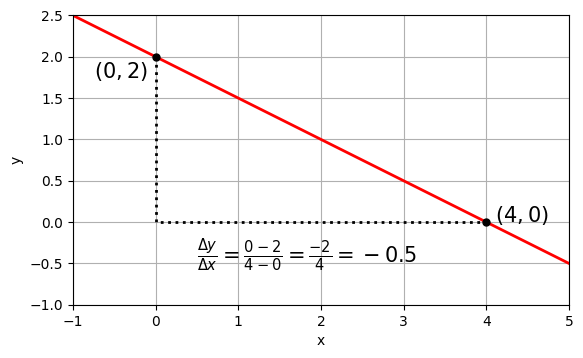

In [22]:
(fig, ax) = plt.subplots(1, 1)
ax.axis('scaled')
ax.set_xlim(-1.0, 5.0)
ax.set_ylim(-1.0, 2.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot([-1, 5], [2.5, -0.5], color='red', linestyle='-', linewidth=2)
ax.plot([0], [2], linestyle='', marker='o', markersize=5, color='black')
ax.plot([4], [0], linestyle='', marker='o', markersize=5, color='black')
ax.text(-0.75, 1.75, '$(0, 2)$', color='black', fontsize=15.0)
ax.text(4.1, 0.0, '$(4, 0)$', color='black', fontsize=15.0)
ax.plot([0, 0, 4], [2, 0, 0], color='black', linestyle=':', linewidth=2)
ax.text(0.5, -0.5, '$\\frac{\\Delta y}{\\Delta x} = \\frac{0 - 2}{4 - 0} = \\frac{-2}{4} = -0.5$', color='black', fontsize=15.0)
ax.grid()

The above line is angled downwards so the vertical difference is negative, making the gradient negative.
An upwards angled line would have a positive gradient line.

With a curve, there is no single gradient like with a straight line, because the steepness changes as you move along the curve.
However, you can calculate the gradient of a curve at a particular point instead, by drawing a straight line that touches the curve at that point (the line is called a tangent) and measuring the gradient of that line.

The below curve includes the gradients of three tangets touching three points on the curve: $(-2, 4)$, $(0, 0)$, and $(1.5, 2.25)$.

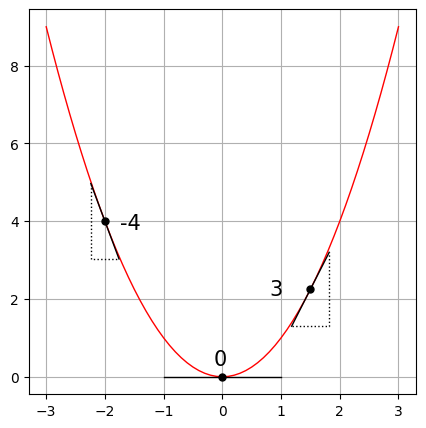

In [23]:
(fig, ax) = plt.subplots(1, 1, figsize=(5, 5))
xs = np.mgrid[-3:3.1:0.1]
ys = xs**2
ax.plot(xs, ys, color='red', linestyle='-', linewidth=1)

ax.plot([-2.24, -1.76], [4.97, 3.03], color='black', linestyle='-', linewidth=1)
ax.plot([-2.24, -2.24, -1.76], [4.97, 3.03, 3.03], color='black', linestyle=':', linewidth=1)
ax.plot([-2], [4], color='black', linestyle='', marker='o', markersize=5)
ax.text(-1.75, 3.8, '-4', color='black', fontsize=15.0)

ax.plot([-1.00, 1.00], [0.00, 0.00], color='black', linestyle='-', linewidth=1)
ax.plot([0], [0], color='black', linestyle='', marker='o', markersize=5)
ax.text(-0.15, 0.3, '0', color='black', fontsize=15.0)

ax.plot([1.18, 1.82], [1.30, 3.20], color='black', linestyle='-', linewidth=1)
ax.plot([1.18, 1.82, 1.82], [1.30, 1.30, 3.20], color='black', linestyle=':', linewidth=1)
ax.plot([1.5], [2.25], color='black', linestyle='', marker='o', markersize=5)
ax.text(0.8, 2.1, '3', color='black', fontsize=15.0)

ax.grid()

For a 3D curve, such as the bowl shown below, the tangent would not be a straight line but a flat plane.

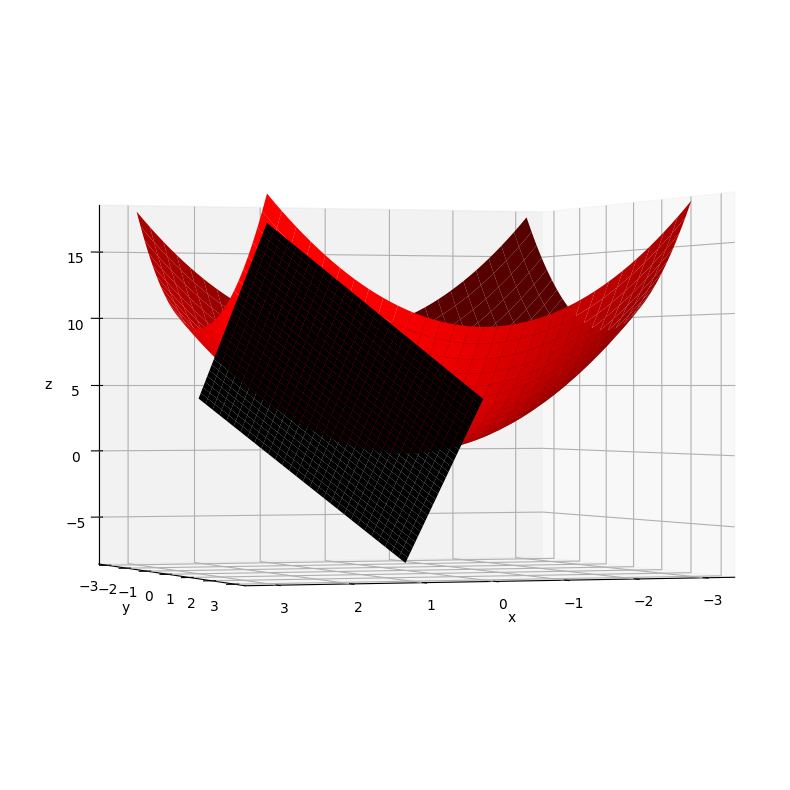

In [24]:
(fig, ax) = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': '3d'})
ax.view_init(0, 70)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

(ys, xs) = np.mgrid[-3:3.1:0.1, -3:3.1:0.1]
zs = xs**2 + ys**2
ax.plot_surface(xs, ys, zs, color='red', linewidth=0, antialiased=True)

(ys, xs) = np.mgrid[0:3.1:0.1, 0:3.1:0.1]
zs = 4*xs + 4*ys - 8
ax.plot_surface(xs, ys, zs, color='black', linewidth=0, antialiased=True)

A flat plane has two gradients (not one, like in a straight line).
It has a gradient in the $x$ direction and another gradient in the $y$ direction.
This is because the plane can be made steeper in either of these two directions independently, as shown below:

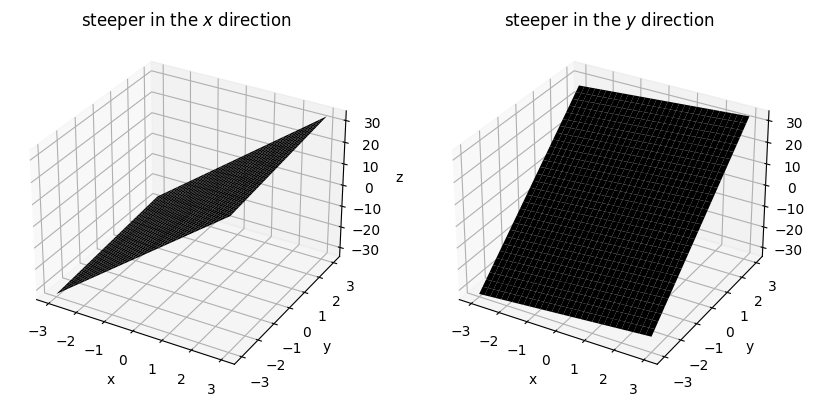

In [25]:
(fig, axs) = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})

axs[0].set_title('steeper in the $x$ direction')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_zlabel('z')
(ys, xs) = np.mgrid[-3:3.1:0.1, -3:3.1:0.1]
zs = 10*xs + ys
axs[0].plot_surface(xs, ys, zs, color='black', linewidth=0, antialiased=True)

axs[1].set_title('steeper in the $y$ direction')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_zlabel('z')
(ys, xs) = np.mgrid[-3:3.1:0.1, -3:3.1:0.1]
zs = xs + 10*ys
axs[1].plot_surface(xs, ys, zs, color='black', linewidth=0, antialiased=True)

So when finding the gradient of a 3D curve, we get two numbers: the gradient with respect to $x$ and the gradient with respect to $y$.
In mathematics, these are called the **partial derivatives** of the curve.

Now PyTorch can automatically calculate the gradient of a function at a point $(x, y)$ with respect to both $x$ and $y$.
This is done as follows:

Start by creating the tensors that you want to find the gradient with respect of, that is, $x$ and $y$.
These will need to be given the additional parameter `requires_grad=True` to tell PyTorch to prepare to calculate the gradient with respect to them.

In [26]:
x = torch.tensor(2.0, dtype=torch.float32, device=device, requires_grad=True)
y = torch.tensor(2.0, dtype=torch.float32, device=device, requires_grad=True)
print('x:', x)
print('y:', y)

x: tensor(2., device='cuda:0', requires_grad=True)
y: tensor(2., device='cuda:0', requires_grad=True)


Next, use these tensors to calculate the equation you want to find the gradient of.

In [27]:
z = x**2 + y**2
print(z)

tensor(8., device='cuda:0', grad_fn=<AddBackward0>)


Now take `z` and apply the `backward` function to it, which will calculate the gradient of the function that produced `z` with respect to all the function's input tensors that had `requires_grad=True`.
Note that the word 'backward' comes from an algorithm called the **backpropagation algorithm** which has a **forward pass** and a **backward pass**.
Calculating `z` is the forward pass, whilst calling the `backward` function is the backward pass.

In [28]:
z.backward()

Now you can find the gradients with respect to `x` and `y` using the `grad` attribute.

In [29]:
print('gradient with respect to x at x=2, y=2:', x.grad)
print('gradient with respect to y at x=2, y=2:', y.grad)

gradient with respect to x at x=2, y=2: tensor(4., device='cuda:0')
gradient with respect to y at x=2, y=2: tensor(4., device='cuda:0')


Finally, we need to reset the gradients of the tensors to zero using the `zero_` function in order to make the `grad` attribute zero.
If you don't do this, then calculating another gradient of the same tensor will add the new gradient to the previous gradient, which will create chaos if you're not aware of it.

In [30]:
print('x.grad:', x.grad)
z = x**2 + y**2
z.backward()
print('x.grad after calling backward again:', x.grad)

x.grad.zero_()
y.grad.zero_()
print('x.grad after calling zero_:', x.grad)

x.grad: tensor(4., device='cuda:0')
x.grad after calling backward again: tensor(8., device='cuda:0')
x.grad after calling zero_: tensor(0., device='cuda:0')


Here it is in its entirety:

In [31]:
x = torch.tensor(2.0, dtype=torch.float32, device=device, requires_grad=True)
y = torch.tensor(2.0, dtype=torch.float32, device=device, requires_grad=True)
print('inital gradient at x:', x.grad)
print('inital gradient at y:', y.grad)
print()

z = x**2 + y**2
z.backward()
print(f'gradient z with respect to x at x={x}, y={y}:', x.grad)
print(f'gradient z with respect to y at x={x}, y={y}:', y.grad)

x.grad.zero_()
y.grad.zero_()

inital gradient at x: None
inital gradient at y: None

gradient z with respect to x at x=2.0, y=2.0: tensor(4., device='cuda:0')
gradient z with respect to y at x=2.0, y=2.0: tensor(4., device='cuda:0')


tensor(0., device='cuda:0')

Note that tensors wrapped in a `Parameter` class are automatically set as `requires_grad=True`.

If you want to take a PyTorch value that was used in the computation of a gradient, such as `z` or `x` above, and turn it into a NumPy array, you need to first detach it from PyTorch's gradient measuring process, like this:

In [32]:
print('z:', z)
print('z.detach().cpu():', z.detach().cpu())
print('z.detach().cpu().numpy():', z.detach().cpu().numpy())
print()
print('x:', x)
print('x.detach().cpu():', x.detach().cpu())
print('x.detach().cpu().numpy():', x.detach().cpu().numpy())

z: tensor(8., device='cuda:0', grad_fn=<AddBackward0>)
z.detach().cpu(): tensor(8.)
z.detach().cpu().numpy(): 8.0

x: tensor(2., device='cuda:0', requires_grad=True)
x.detach().cpu(): tensor(2.)
x.detach().cpu().numpy(): 2.0


You will notice that you can only find the gradient at a single point rather than finding the general gradient function.
PyTorch does not find the general gradient function and each new gradient will require a new forward pass and backward pass (as described above).